In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
train_raw = pd.DataFrame(pd.read_csv("./data/input/train.csv"))

In [3]:
train_raw.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


**1. Look at columns of data**

In [4]:
print("There are {} columns. They are:\n" .format(len(train_raw.columns)))
train_raw.columns

There are 12 columns. They are:



Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

**2. Remove duplicate observations**

In [5]:
#train = train_raw.drop_duplicates()

In [6]:
train_raw.shape

(10506, 12)

**2. Find columns with missing/null values**

In [7]:
# Function to find missing/ null values
def Get_zero_vals(df):
    for zero_values in df:
        df_zero_values = (df[zero_values] == 0).sum()
        if df_zero_values != 0:        
            print(f'{zero_values}: {df_zero_values} Zeros')
            
Get_zero_vals(train_raw)

WnvPresent: 9955 Zeros


In [8]:
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(train_raw)

**3. Deal with missing/ null values**

Strangely there are no null values, so I dont have to worry about dealing with it

As for the zero values, they are only presnet in the column 'WnvPresent' where 0 relates to the absence of west nile virus

**4. Categorise variables** 
- Data types 
- Indicators

In [9]:
# Function to view data type and value counts for each column 
def dtype_valuecounts(df):
    for i in df.columns:
        print(i,":", df[i].dtypes,"\n", "Value_Counts:", len(df[i].value_counts()),'\n')

In [10]:
train_raw.shape[0]/10

1050.6

In [11]:
dtype_valuecounts(train_raw)

Date : object 
 Value_Counts: 95 

Address : object 
 Value_Counts: 138 

Species : object 
 Value_Counts: 7 

Block : int64 
 Value_Counts: 64 

Street : object 
 Value_Counts: 128 

Trap : object 
 Value_Counts: 136 

AddressNumberAndStreet : object 
 Value_Counts: 138 

Latitude : float64 
 Value_Counts: 138 

Longitude : float64 
 Value_Counts: 138 

AddressAccuracy : int64 
 Value_Counts: 4 

NumMosquitos : int64 
 Value_Counts: 50 

WnvPresent : int64 
 Value_Counts: 2 



There are 9693 observations in this train dataset.

Comparing the number of observations and the value counts of each column, we can deduce that all the features of this dataset can be categorical as even if certain variables are of a float datatype, they are not continuous. 
- Eg. There are 138 different Latitudes and Longitudes even though they are float 

**5. Identify outliers**
- box-plot - for both numerical and nominal data
- scatter plot - for numerical data 
- histogram - for nominal and ordinal data

In [12]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.7, color='r')

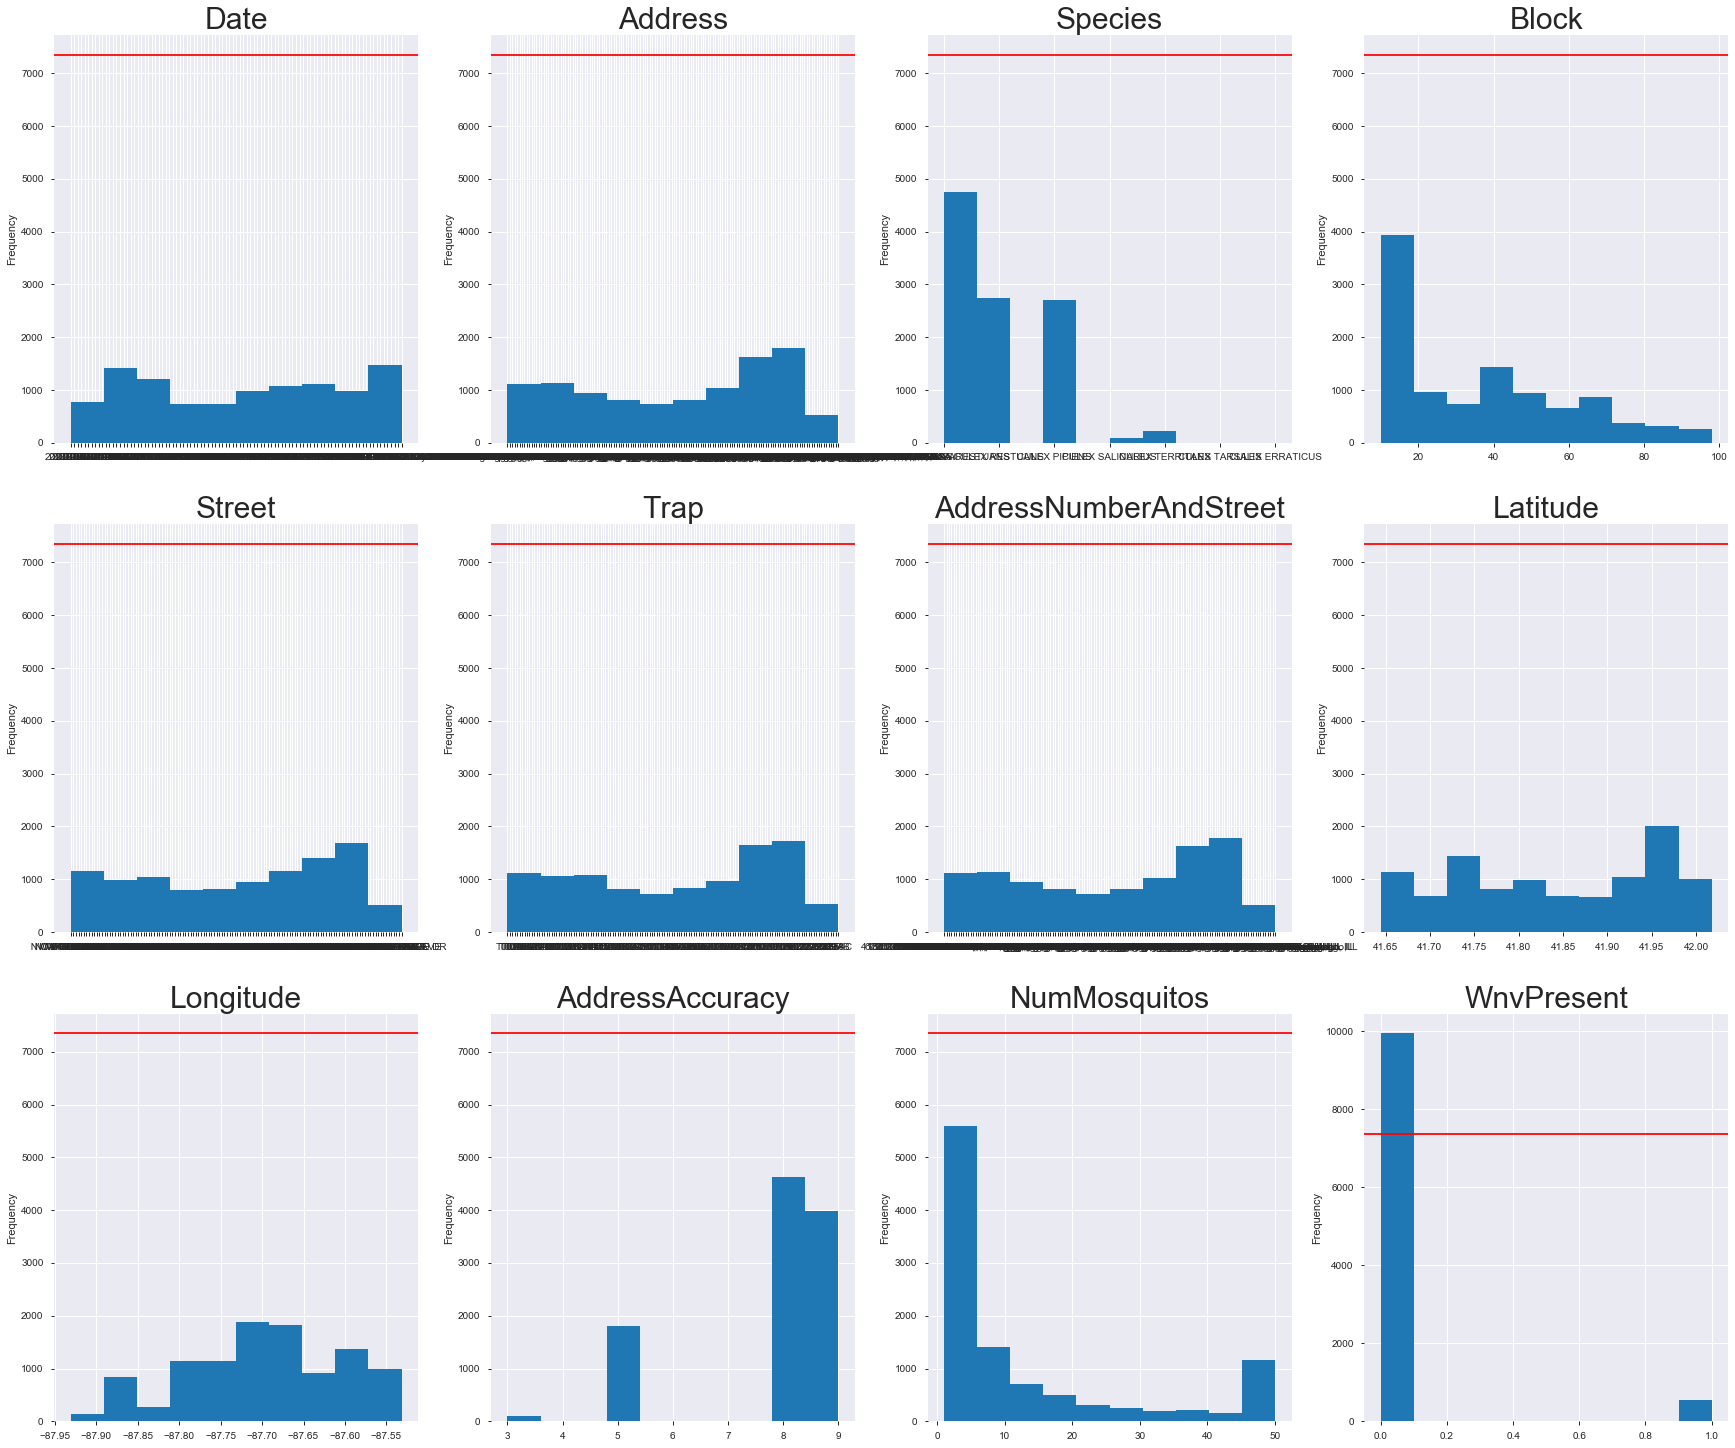

In [13]:
subplot_histograms(train_raw, train_raw.columns, train_raw.columns)

**6. Find and eliminate correlated variable**

**Pandas Profiling**

In [14]:
pandas_profiling.ProfileReport(train_raw)

- There seems to be a significant correlation between latitude/ longitude and AddressAcuracy
- Another correlation can be seen in NumMosquitos and WnvPresent

- Converting 'Date' column to date-time

In [15]:
train_raw['Date'] = pd.to_datetime(train_raw['Date'])

**7. Save to csv**

In [17]:
train_raw.to_csv('./train_cleaned.csv', encoding= 'utf-8', index= False)

**EDA**

- Groupby/ find unique value counts for 'Address'

In [ ]:
train_raw['Address'].value_counts()

- Groupby/ find unique value counts for 'AddressNumberAndStreet'

In [ ]:
train_raw['AddressNumberAndStreet'].value_counts()

In [ ]:
train_raw['AddressAccuracy'].value_counts()

"The first technique, “method A”, consisted in an automatic method based on a free online geocoding service accessible at http://dehaese.free.fr/Gmaps/testGeocoder.htm. The reference street network database was based on Google Maps® ; the total number of addresses stored in the database was not provided by Google®. After automatic online geocoding processing, latitude and longitude coordinates in the WGS 84 projection system were exported for each address geocoded as well as accuracy of each location ranking from 0 to 9 (0: not found, 1: country level, 2: region (state and district), **3: county**, 4: city, **5: postal code**, 6: street segment, 7: intersection of streets, **8: address**, **9: point of interest (building names, church…)**). In France, levels 2, 3 and 7 did not exist in the administrative division of territories and were therefore not applicable. For geocoded addresses with a precision lower than 6 (street segment level), the spelling of street names and municipalities were checked again manually and corrected if necessary. Revised addresses were then geocoded a second time with the same online geocoder. The database was imported into ArcGIS 10.0 (Environmental System Research Institute- ESRI-Redlands, CA, USA) to create a data layer and all coordinates were converted into Lambert 93, which is the projection system currently used in France." 
    
- link https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5324215/

The project requires us to do cost benefit analysis based on levels. We can use this Address Acuracy for the levels 

- Thus, all we need is the latitude, longitude and addressaccuracy 

- Groupby/ find unique value counts for 'Trap'

In [ ]:
len(train_raw['Trap'].value_counts())

There are 136 different types of Traps. Of which, 134 are normal type traps and 2 that are satellite traps

In [ ]:
train_raw['Trap'].value_counts()

In [ ]:
train_raw.columns

In [18]:
train_raw.groupby('AddressAccuracy')['Trap'].count()

AddressAccuracy
3      91
5    1807
8    4628
9    3980
Name: Trap, dtype: int64

This shows the number of traps in each Level

In [ ]:
train_raw.groupby('AddressNumberAndStreet')['Trap','AddressAccuracy'].agg(['unique','count'])

This shoows that each address has each address has a unique trap and AddressAccuray trap. Therefore we can colclude that each each trap is localised to an address only 

In [ ]:
train_raw[train_raw['Trap'] == 'T001']

In [ ]:
train_pt = pd.pivot_table(train_raw, index = ['AddressNumberAndStreet','Date','Latitude','Longitude','AddressAccuracy','Station','WnvPresent','Trap'], values = 'NumMosquitos', columns=['Species'],aggfunc=np.sum)

In [ ]:
train_pt

In [ ]:
train_pt.fillna(0)

**Plot Heatmap**

In [ ]:
mapdata = np.loadtxt("./data/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

train_locations = train_raw[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter([-87.933,-87.752],[41.995,41.786], marker = 'o', c= 'red')
plt.scatter(train_raw.Longitude, train_raw.Latitude, c=train_raw.Station)

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

**Mapping indiv loactions to weather stations**

In [ ]:
weather_location = [[-87.933,-87.752],[41.995,41.786]]

In [ ]:
# w1 is the upper red dot
w1lon = weather_location[0][0]
w1lat = weather_location[1][0]
# w2 is the lower red dot
w2lon = weather_location[0][1]
w2lat = weather_location[1][1]

In [ ]:
train[['Longitude','Latitude']].head()

In [ ]:
train_raw['L1'] = np.sqrt((train_raw['Longitude'] - w1lon)**2 + (train_raw['Latitude'] - w1lat)**2)
train_raw['L2'] = np.sqrt((train_raw['Longitude'] - w2lon)**2 + (train_raw['Latitude'] - w2lat)**2)

In [ ]:
# def co_ord_lon(row):
#     if row['L1'] < row['L2']:
#         val = w1lon
#     else:
#         val = w2lon
    
#     return val
        
# def co_ord_lat(row):
#     if row['L1'] < row['L2']:
#         val = w1lat
#     else:
#         val = w2lat
        
#     return val

In [ ]:
def station(row):
    if row['L1'] < row['L2']:
        val = 1
    else:
        val = 2
        
    return val 

In [ ]:
train_raw['Station'] = train_raw.apply(station, axis=1)

In [ ]:
#train['W longitude'] = train.apply(co_ord_lon, axis=1)

In [ ]:
#train['W latitude'] = train.apply(co_ord_lat, axis = 1)

In [ ]:
train_raw.head()

**Mapping train to spray**